In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

df = pd.read_csv('../../data/imputed_dataset.csv')

# Add conference group feature
conference_group = {'SEC': 'power_5', 'Big Ten': 'power_5', 'ACC': 'power_5', 'Big 12': 'power_5'
                  , 'FBS Independents': 'ind', 'Mountain West': 'group_5'
                  , 'Pac-12': 'power_5', 'Mid-American': 'group_5', 'American Athletic': 'group_5'
                  , 'Sun Belt': 'group_5', 'Conference USA': 'group_5'}

df["conf_group"] = df["conference"].map(conference_group)

df.head()

,name,rating,ranking,year,position,height,weight,latitude,longitude,hometown_city,state_province,hometown_country,stars,committed_to,athlete_id,is_drafted,conference,latitude_school,longitude_school,wins_rolling_2year,games_played_rolling_2year,post_season_wins_rolling_2year,point_diff_rolling_2year,win_pct_rolling_2year,distance_miles,side_of_ball,position_group,conf_group
0,Dorial Green-Beckham,0.9997,1.0,2012,WR,78.0,220.0,37.216678,-93.292037,Springfield,MO,USA,5,Missouri,531380.0,1.0,SEC,38.935849,-92.333201,18.0,26.0,1.0,300.0,0.692308,129.726375,offense,pass_catcher,power_5
1,Mario Edwards,0.9995,2.0,2012,DT,75.0,285.0,33.215039,-97.133052,Denton,TX,USA,5,Florida State,530290.0,1.0,ACC,30.438169,-84.304403,19.0,27.0,2.0,366.0,0.703704,776.590432,defense,d_line,power_5
2,D.J. Humphries,0.9979,3.0,2012,OT,77.0,275.0,35.227200,-80.843083,Charlotte,NC,USA,5,Florida,-1009881.0,1.0,SEC,29.649936,-82.348579,15.0,26.0,2.0,178.0,0.576923,395.212334,offense,o_line,power_5
3,Shaq Thompson,0.9975,4.0,2012,S,74.0,210.0,38.581572,-121.494400,Sacramento,CA,USA,5,Washington,535329.0,1.0,Big Ten,47.650323,-122.301575,14.0,26.0,1.0,-130.0,0.538462,627.908306,defense,d_backfield,power_5
4,Noah Spence,0.9974,5.0,2012,WDE,75.0,235.0,40.266311,-76.886112,Harrisburg,PA,USA,5,Ohio State,-1027150.0,1.0,Big Ten,40.001645,-83.019727,18.0,26.0,1.0,363.0,0.692308,324.459618,defense,d_line,power_5


In [3]:
# df.isna().sum()

In [14]:
# Drop categorical columns for dimensionality reduction / clustering:
df_quant = df.drop(columns = ['position', 'state_province', 'committed_to',
                              'committed_to', 'year', 'conference',
                              'side_of_ball', 'position_group', 'conf_group', 'stars',
                              'hometown_city', 'athlete_id', 'name', 'hometown_country', # Andreea added on 10/1
                              'post_season_wins_rolling_2year']) # not many distinct values
df_quant.head()

,rating,ranking,height,weight,latitude,longitude,is_drafted,latitude_school,longitude_school,wins_rolling_2year,games_played_rolling_2year,point_diff_rolling_2year,win_pct_rolling_2year,distance_miles
0,0.9997,1.0,78.0,220.0,37.216678,-93.292037,1.0,38.935849,-92.333201,18.0,26.0,300.0,0.692308,129.726375
1,0.9995,2.0,75.0,285.0,33.215039,-97.133052,1.0,30.438169,-84.304403,19.0,27.0,366.0,0.703704,776.590432
2,0.9979,3.0,77.0,275.0,35.227200,-80.843083,1.0,29.649936,-82.348579,15.0,26.0,178.0,0.576923,395.212334
3,0.9975,4.0,74.0,210.0,38.581572,-121.494400,1.0,47.650323,-122.301575,14.0,26.0,-130.0,0.538462,627.908306
4,0.9974,5.0,75.0,235.0,40.266311,-76.886112,1.0,40.001645,-83.019727,18.0,26.0,363.0,0.692308,324.459618


In [15]:
X = df_quant.drop(columns = ['is_drafted'])
y = df_quant['is_drafted']

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_scaled.head()

,rating,ranking,height,weight,latitude,longitude,latitude_school,longitude_school,wins_rolling_2year,games_played_rolling_2year,point_diff_rolling_2year,win_pct_rolling_2year,distance_miles
0,2.967899,-1.493761,1.609536,-0.003574,0.447271,-0.127447,0.421016,-0.040218,0.719918,0.362495,0.820877,0.773952,-0.568584
1,2.964356,-1.492798,0.414951,1.434095,-0.305947,-0.382160,-1.340881,0.522908,0.897529,1.119574,1.064530,0.831514,0.600467
2,2.936013,-1.491834,1.211341,1.212916,0.072797,0.698095,-1.504312,0.660086,0.187083,0.362495,0.370488,0.191132,-0.088782
3,2.928927,-1.490870,0.016757,-0.224754,0.704181,-1.997663,2.227862,-2.142148,0.009471,0.362495,-0.766559,-0.003142,0.331760
4,2.927156,-1.489906,0.414951,0.328196,1.021295,0.960498,0.641996,0.613013,0.719918,0.362495,1.053455,0.773952,-0.216651


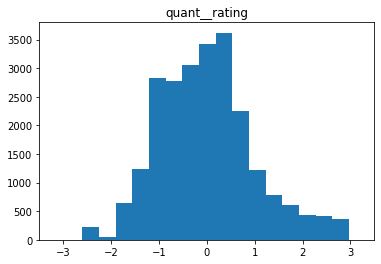

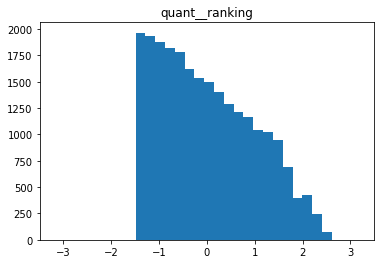

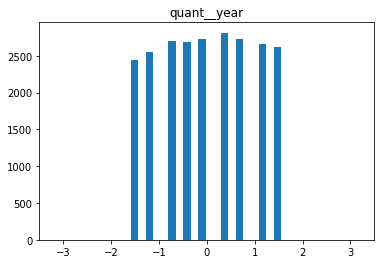

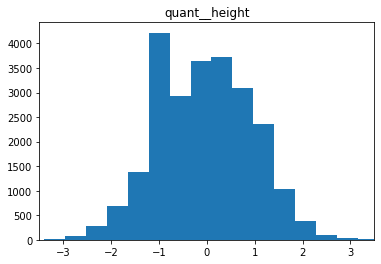

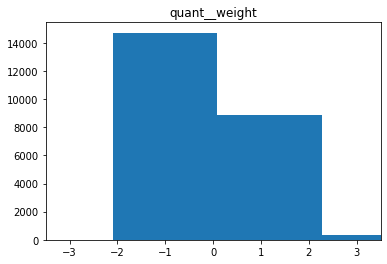

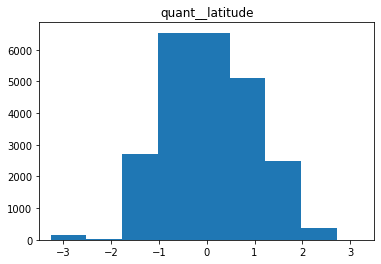

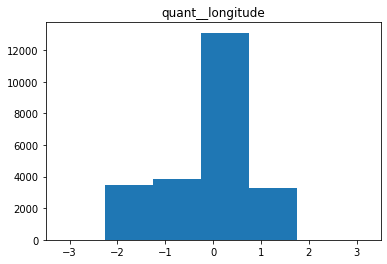

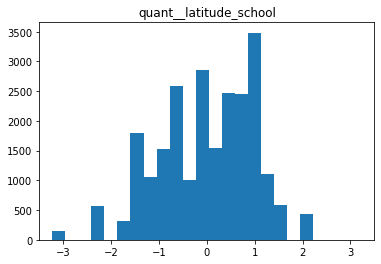

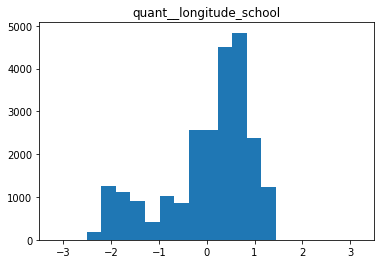

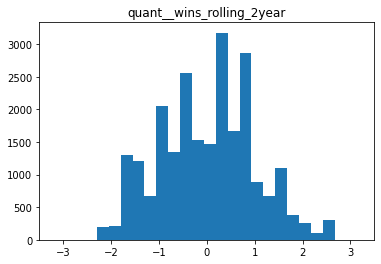

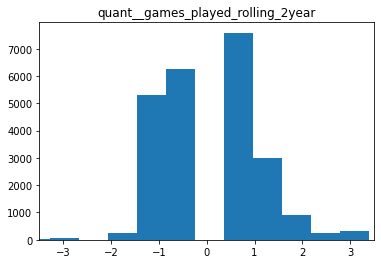

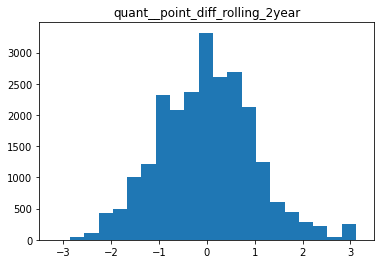

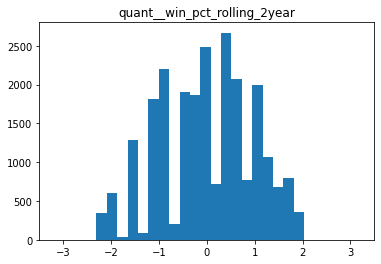

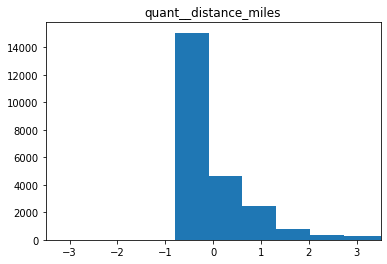

In [7]:
for col in list(X_scaled.columns):
    plt.hist(X_scaled[col], bins = 20)
    plt.title(col)

    ax = plt.gca()
    ax.set_xlim([-3.5, 3.5])
    # ax.set_ylim([ymin, ymax])
    plt.show()
    plt.close()

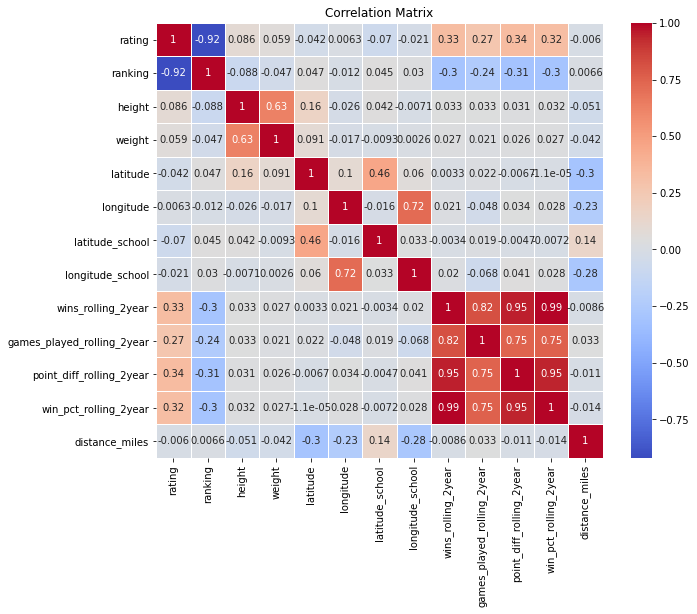

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = X_scaled.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

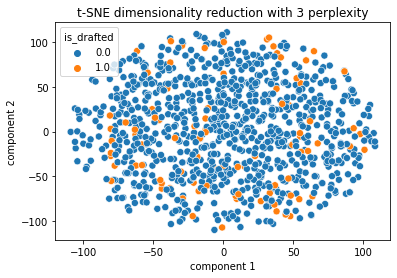

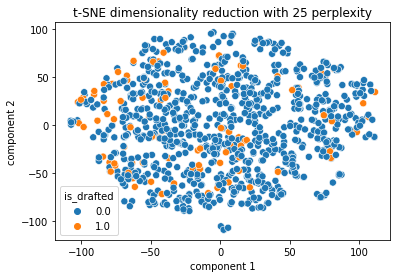

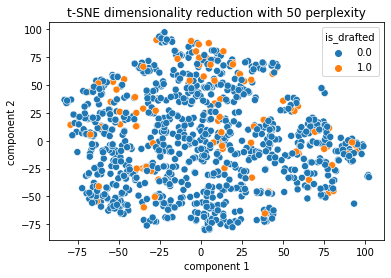

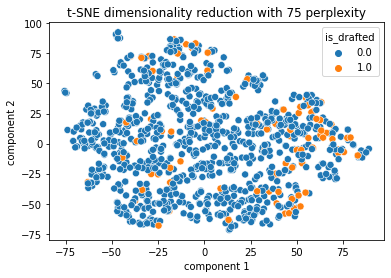

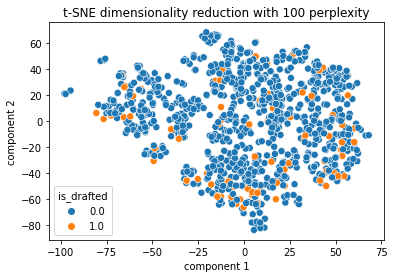

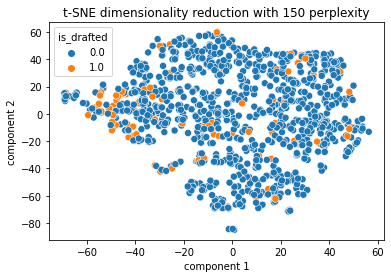

In [19]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

perplexity = [3, 25, 50, 75, 100, 150]

for p in perplexity:

    # t-SNE dim reduction
    X_embedded = TSNE(n_components=2, learning_rate='auto',
                      init='random', perplexity=p).fit_transform(X_scaled)
    
    # Plot
    color = 'is_drafted'
    
    X_emb_df = pd.DataFrame(X_embedded, columns = ['component 1', 'component 2'])
    X_emb_df[color] = df[color]
    
    X_plot = X_emb_df.sample(1000)
    
    sns.scatterplot(x=X_plot['component 1'], y=X_plot['component 2'], hue=X_plot[color], palette='tab10', s=50)
        
    # Add labels and title
    plt.title("t-SNE dimensionality reduction with " + str(p) + " perplexity")
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    
    # Show the plot
    plt.show()


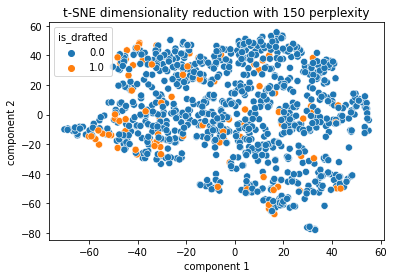

In [20]:
# I tried running higher values of p, but there wasn't any better separation and it took forever to run. 

p = 150

# t-SNE dim reduction
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=p).fit_transform(X_scaled)

# Plot
color = 'is_drafted'

X_emb_df = pd.DataFrame(X_embedded, columns = ['component 1', 'component 2'])
X_emb_df[color] = df[color]

X_plot = X_emb_df.sample(1000)

sns.scatterplot(x=X_plot['component 1'], y=X_plot['component 2'], hue=X_plot[color], palette='tab10', s=50)
    
# Add labels and title
plt.title("t-SNE dimensionality reduction with " + str(p) + " perplexity")
plt.xlabel('component 1')
plt.ylabel('component 2')

# Show the plot
plt.show()

### SVD (Singular Value Decomposition)

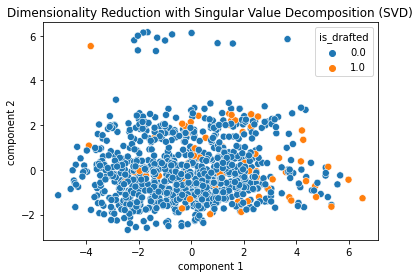

In [21]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2, random_state=42)
X_SVD = svd.fit_transform(X_scaled) 
X_SVD = pd.DataFrame(X_SVD, columns = ['component 1', 'component 2'])
X_SVD[color] = df[color]

X_SVD_samp = X_SVD.sample(1000, random_state = 0)

sns.scatterplot(x=X_SVD_samp['component 1'], y=X_SVD_samp['component 2'], hue=X_SVD_samp[color], palette='tab10', s=50)
        
# Add labels and title
plt.title("Dimensionality Reduction with Singular Value Decomposition (SVD)")
plt.xlabel('component 1')
plt.ylabel('component 2')

# Show the plot
plt.show()


### Clustering of t-SNE with 150 perplexity

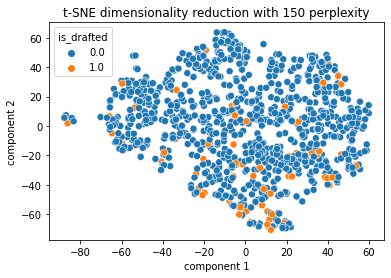

In [19]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

p = 150

# Plot
color = 'is_drafted'

X_emb_df = pd.DataFrame(X_embedded, columns = ['component 1', 'component 2'])
X_emb_df[color] = df[color]

X_plot = X_emb_df.sample(1000)

sns.scatterplot(x=X_plot['component 1'], y=X_plot['component 2'], hue=X_plot[color], palette='tab10', s=50)
    
# Add labels and title
plt.title("t-SNE dimensionality reduction with " + str(p) + " perplexity")
plt.xlabel('component 1')
plt.ylabel('component 2')

# Show the plot
plt.show()

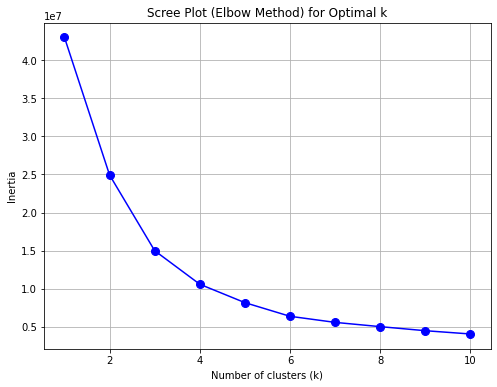

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Range of potential cluster numbers (e.g., from 1 to 10)
k_values = range(1, 11)
inertia_values = []

# Fit KMeans with different k values and store the inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_emb_df)
    inertia_values.append(kmeans.inertia_)

# Plot the Scree Plot (Elbow Method)
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Scree Plot (Elbow Method) for Optimal k')
plt.grid(True)
plt.show()


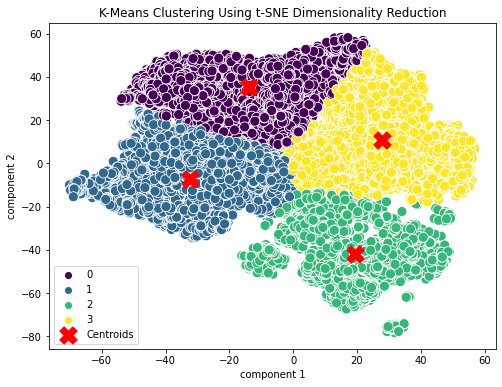

In [23]:
from sklearn.cluster import KMeans

number_of_clusters = 4

kmeans = KMeans(n_clusters=number_of_clusters, random_state=0)
X_emb_df['cluster'] = kmeans.fit_predict(X_emb_df)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_emb_df, x='component 1', y='component 2', hue='cluster', palette='viridis', s=100)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('K-Means Clustering Using t-SNE Dimensionality Reduction')
plt.legend()
plt.show()

#### Check draft rate by cluster

In [24]:
import altair as alt
a = X_emb_df.groupby(by = 'cluster').agg({'is_drafted': 'mean', 'component 1': 'count'}).reset_index()

title={
      "text": ["Draft Rate by Cluster"], 
      "subtitle": ["Clusters Developed Using t-SNE w/ perplexity = 150"]
    }

alt.Chart(a).mark_bar(size = 50).encode(
    x = 'cluster:N', y = alt.Y('is_drafted:Q', title = '% Drafted'),
    color = 'cluster:N').properties(
    height = 300, width = 300).properties(title = title, height = 400, width = 500)

alt.Chart(...)

#### Check distribution of players by cluster

In [25]:
title={
      "text": ["# of Players in Each Cluster"], 
      "subtitle": ["Clusters Developed Using t-SNE w/ perplexity = 150"]
    }


alt.Chart(a).mark_bar(size = 50).encode(
    y = 'cluster:N', x = alt.X('component 1:Q', title = '# of Records'),
    color = 'cluster:N').properties(
    height = 250, width = 300).properties(title = title, height = 400, width = 300)

alt.Chart(...)

In [26]:
a.rename({'is_drafted': 'draft_rate', 'component 1': '# of players'}, axis = 1)

,cluster,draft_rate,# of players
0,0,0.087299,5842
1,1,0.122433,6477
2,2,0.075723,5190
3,3,0.053588,6438


#### Silhouette plot & score

In [27]:
# Siloutte Score
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_emb_df[['component 1', 'component 2']], X_emb_df['cluster'])
print('Silhouette Score: ' + str(silhouette_avg))

Silhouette Score: 0.42015833


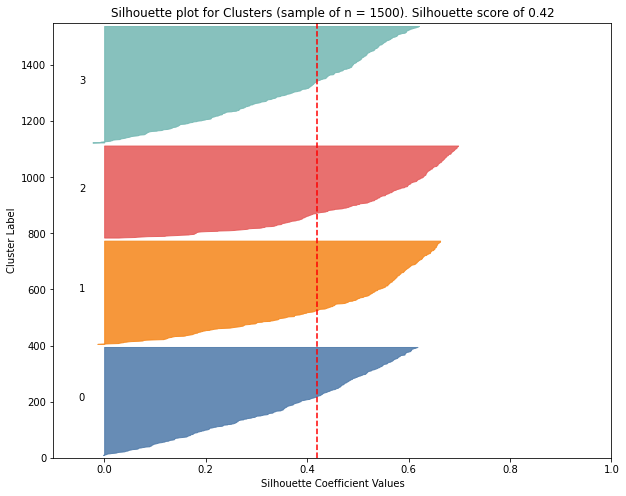

In [28]:
# Calculate the silhouette scores for each sample
import numpy as np

silhouette_sample_df = X_emb_df.sample(1500, random_state = 0)

sample_silhouette_values = silhouette_samples(silhouette_sample_df[['component 1', 'component 2']], silhouette_sample_df['cluster'])

# Create the silhouette plot
fig, ax1 = plt.subplots(1, 1)

# Set limits for the plot
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(silhouette_sample_df) + (number_of_clusters + 1) * 10])

# This will match altair's color shecme
colors = ['#4c78a8', '#f58518', '#e45756', '#72b7b2', '#54a24b', '#eeca3b', '#b279a2', '#ff9da6', '#9d755d', '#bab0ac'] 

## Loop over each cluster and plot silhouette values
y_lower = 10
for i in [0, 1, 2, 3]:
    ith_cluster_silhouette_values = sample_silhouette_values[silhouette_sample_df['cluster'] == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / number_of_clusters)
    color = colors[i] # ['#4c78a8', '#f58518', '#e45756', '#72b7b2']
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.85)

    # Label the silhouette plots with their cluster numbers in the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for the next plot
    y_lower = y_upper + 10  # 10 for the 0 samples gap between clusters

# Add labels and title
ax1.set_title("Silhouette plot for Clusters (sample of n = 1500). Silhouette score of " + str(round(silhouette_avg, 3)))
ax1.set_xlabel("Silhouette Coefficient Values")
ax1.set_ylabel("Cluster Label")

# # The vertical line for average silhouette score
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
fig.set_size_inches(10, 8)
plt.show()